В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [108]:
# https://github.com/Yuliya-Hiryak/ML_tasks/blob/main/process_bank_churn.py

In [90]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from process_bank_churn import preprocess_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [91]:
raw_df = pd.read_csv("https://docs.google.com/spreadsheets/d/11uG3Rk3uaw-RLfTY-dkWST3EdSvhpNQipIu6PylnWBM/gviz/tq?tqx=out:csv&sheet=Sheet1")
data = preprocess_data(raw_df, target_col='Exited', scaler_numeric=True)
model = DecisionTreeClassifier(random_state=42)
model.fit(data['X_train'], data['train_targets'])

# area under ROC curve train
train_auc = roc_auc_score(data['train_targets'], model.predict_proba(data['X_train'])[:, 1])
# area under ROC curve validation
val_auc = roc_auc_score(data['val_targets'], model.predict_proba(data['X_val'])[:, 1])
print(f"Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

# tree depth
print(f"Tree depth: {model.get_depth()}")

Train AUC: 1.0000, Validation AUC: 0.7700
Tree depth: 26


Максимальна глубина дерева становить 23. Згідно з ROC показником на тренувальних даних модель навчилась передбачати на 100% правильно, проте показник ROC на валідаційних даних становить 77,51% що говорить про перетренування моделі, яка навчилась на тренувальних даних проте коли заходять нові дані показник точності знизивсь на чверть. Тому модель потрібно удосконалити.

In [92]:
# Show the tree
tree_rules = export_text(model, feature_names=data['input_cols'])
print(tree_rules[:3000])

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.38
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= 0.32
|   |   |   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |   |   |--- Gender_Female <= 0.50
|   |   |   |   |   |   |   |--- CreditScore <= 0.31
|   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.57
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  0.18
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- EstimatedSalary >  0.57
|   |   |   |   |   |   |   |   |   |--- Tenure <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 0.64
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  0.64
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   | 

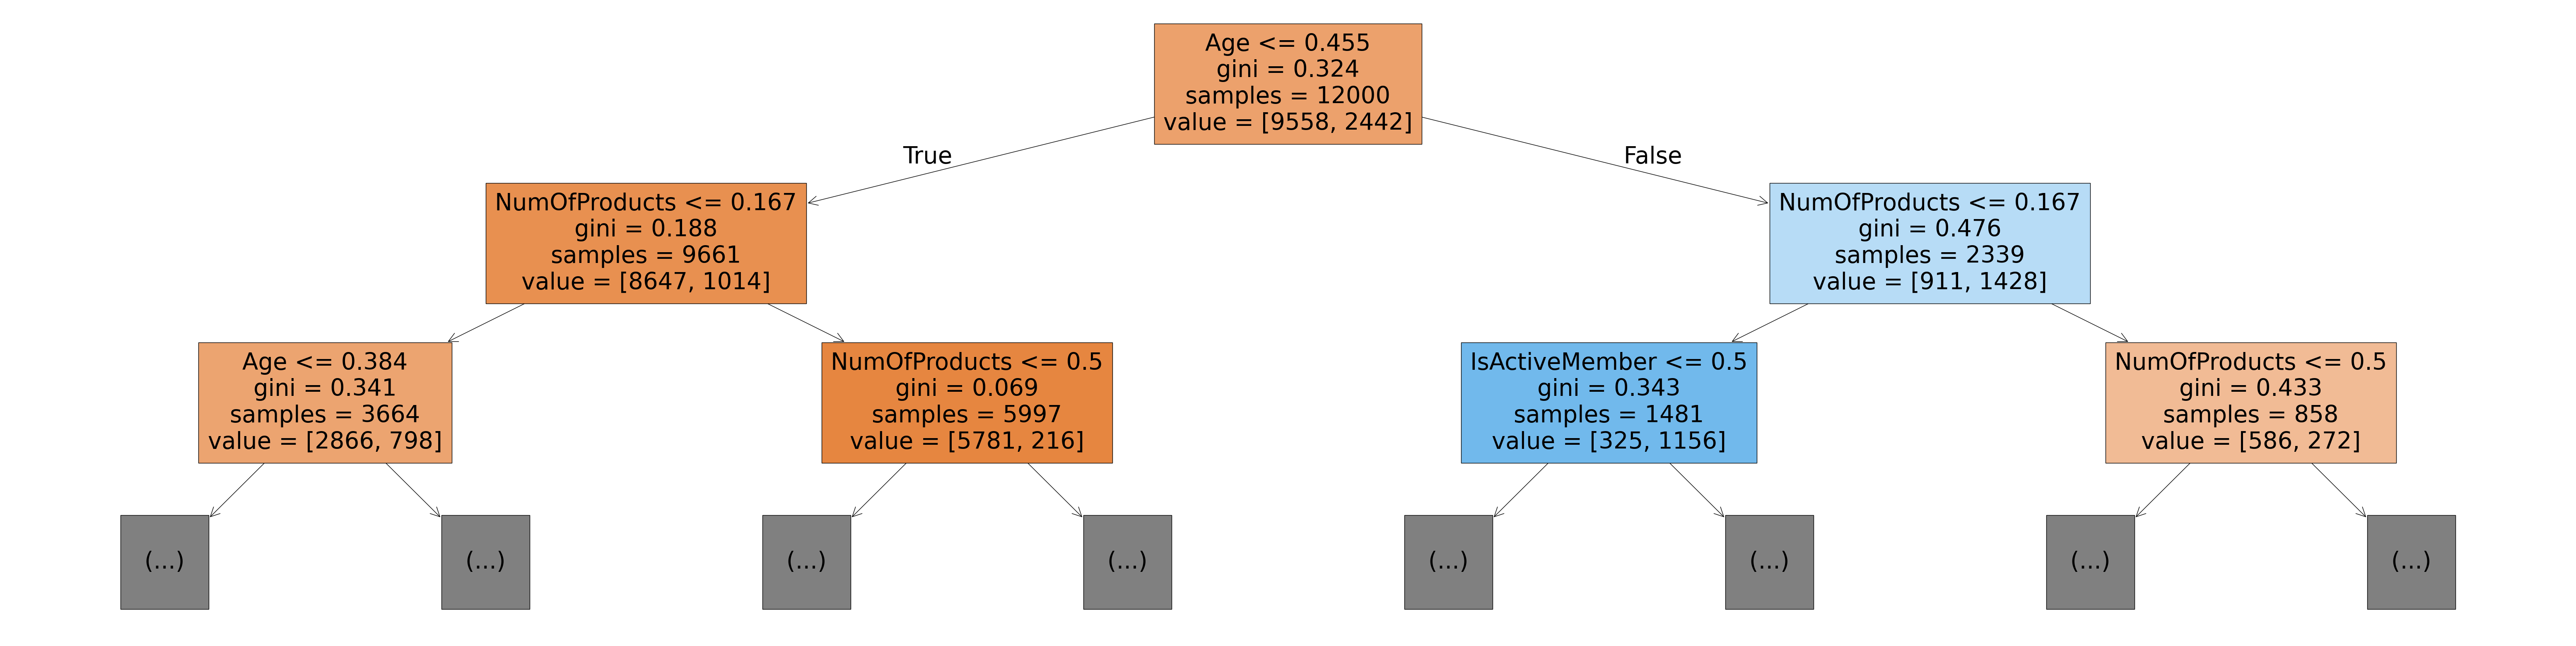

In [93]:
# Show tree graphically
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=data['input_cols'], max_depth=2, filled=True)
plt.show()

З наведених вище візуалізацій можна зробити висновок що найбільш важливими параметрами для прийняття рішень є:
- `Age`: Вік клієнта
- `NumOfProducts`: Кількість банківських продуктів, які використовує клієнт (наприклад, ощадний рахунок, кредитна картка)
- `IsActiveMember`: Чи є клієнт активним членом банку

In [94]:
# Show feature importance DF
importance_df = pd.DataFrame({
    'feature': data['input_cols'],
    'importance': model.feature_importances_.round(2)
}).sort_values(by='importance', ascending=False)
print(importance_df.head(10))

             feature  importance
1                Age        0.36
4      NumOfProducts        0.17
0        CreditScore        0.12
7    EstimatedSalary        0.12
3            Balance        0.08
2             Tenure        0.05
6     IsActiveMember        0.03
5          HasCrCard        0.01
8   Geography_France        0.01
9  Geography_Germany        0.01


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

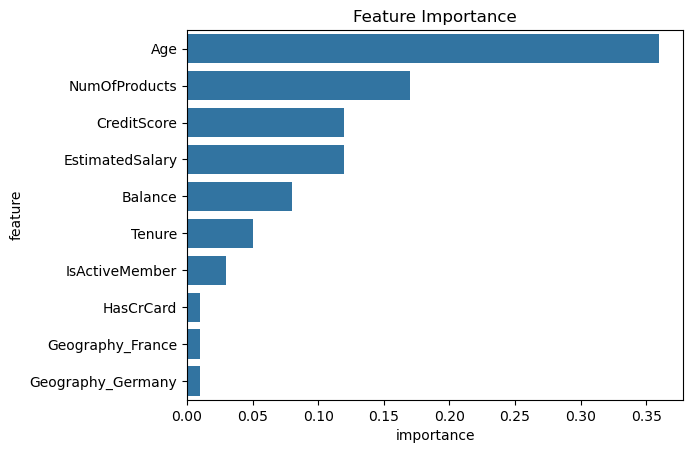

In [95]:
# Show feature importance
plt.title("Feature Importance")
sns.barplot(x='importance', y='feature', data=importance_df.head(10))

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [96]:
def train_tree( data: dict, max_depth: int, max_leaf_nodes: int | None) -> dict:
    """
    Train a Decision Tree model with specified parameters and evaluate its performance.

    Args:
        max_depth (int): Maximum depth of the tree.
        max_leaf_nodes (int | None): Maximum number of leaf nodes.
        data (dict): Dictionary containing training and validation data.

    Returns:
        dict: A dictionary containing training and validation AUC scores, tree depth, and number of leaf nodes.
    """
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(data['X_train'], data['train_targets'])

    train_auc = roc_auc_score(data['train_targets'], model.predict_proba(data['X_train'])[:, 1])
    val_auc = roc_auc_score(data['val_targets'], model.predict_proba(data['X_val'])[:, 1])

    return {
        'tree_depth': model.get_depth(),
        'tree_max_leaf_nodes': model.get_n_leaves(),
        'train_auc': train_auc,
        'val_auc': val_auc,
    }

def print_tree_rules(tree_rules) -> None:
    print(f"Train AUC: {tree_rules['train_auc']:.4f},\nValidation AUC: {tree_rules['val_auc']:.4f},\nTree Depth: {tree_rules['tree_depth']},\nMax Leaf Nodes: {tree_rules['tree_max_leaf_nodes']}")


In [97]:
max_depth = 2
max_leaf_nodes = 10

tree_rules = train_tree(data, max_depth, max_leaf_nodes)
print_tree_rules(tree_rules)

Train AUC: 0.8429,
Validation AUC: 0.8465,
Tree Depth: 2,
Max Leaf Nodes: 4


In [98]:
max_depth = 11
max_leaf_nodes = 120

tree_rules = train_tree(data, max_depth, max_leaf_nodes)
print_tree_rules(tree_rules)

Train AUC: 0.9394,
Validation AUC: 0.9066,
Tree Depth: 11,
Max Leaf Nodes: 120


In [99]:
max_depth = 5
max_leaf_nodes = 30

tree_rules = train_tree(data, max_depth, max_leaf_nodes)
print_tree_rules(tree_rules)

Train AUC: 0.9257,
Validation AUC: 0.9219,
Tree Depth: 5,
Max Leaf Nodes: 29


Обираючи навмання три різних набори max_depth та max_leaf_nodes, модель зможе краще передбачати при max_depth = 5 та max_leaf_nodes = 30 і її точність як на тестувальних так і на валідаційних даних буде достатньо висока (> 0.92) порівняно з іншими наборами параметрів. Наприклад, max_depth = 11 та max_leaf_nodes = 20 точність на тренувальних даних буде більша проте на валідаційних - менша, що свідчить про перетренування моделі.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [100]:
roc_df = pd.DataFrame([train_tree(data, max_depth, max_leaf_nodes = None) for max_depth in range(1, 21)])
roc_df.style.background_gradient(subset="train_auc", cmap="Blues").background_gradient(subset="val_auc", cmap="Reds").format({
    'tree_depth': '{:.0f}',
    'tree_max_leaf_nodes': '{:.0f}',
    'train_auc': '{:.4f}',
    'val_auc': '{:.4f}',
}).set_caption("ROC AUC Scores for Different Tree Depths")

,tree_depth,tree_max_leaf_nodes,train_auc,val_auc
0,1,2,0.7447,0.7349
1,2,4,0.8429,0.8465
2,3,8,0.8972,0.8911
3,4,15,0.9113,0.9113
4,5,29,0.9257,0.9219
5,6,56,0.9338,0.9211
6,7,100,0.9415,0.9144
7,8,177,0.9495,0.9031
8,9,281,0.9591,0.8847
9,10,408,0.9698,0.8484


Найкраще на валідаційних даних повела себе модель з максимальною глибиною дерева в 5 нод (0,9219) але тут слабкі ознаки перенавчання і починаючи з цієї ноди модель показує ознаки перенавчання і чим більше стає нод то це перенавчання стає все виразнішим. При максимальній глибині дерева в 4 ноди модель показує однакові значення ROC з чого можна зробити висновок що при максимальній гдибині дерева в 4 ноди ми отримаємо модель яка буде передбачати з найкращою точністю.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [107]:
from process_bank_churn import preprocess_new_data

model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=42)
model.fit(data['X_train'], data['train_targets'])

test_raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1oRLDSQ8Mlc0nq_mTS7ffBFWij7WMGu5lh1-5H5abBWc/gviz/tq?tqx=out:csv&sheet=Test")
test_df = preprocess_new_data(test_raw_data, scaler=data['scaler'], encoder=data['encoder'], input_cols=data['input_cols'])
# Predict on the test set
test_df['Exited'] = model.predict(test_df)

# Read sample_submission.csv file
sample_submission = pd.read_csv("https://docs.google.com/spreadsheets/d/1OuQDoTmdSp2jDaBEGLF3pOWXJvj0USSem35Elxxfg4M/gviz/tq?tqx=out:csv&sheet=SampleSubmission")
# Save the predictions to the sample_submission DataFrame by id without indexes
sample_submission['Exited'] = test_df['Exited']
# Save csv file with predictions
sample_submission.to_csv("submission_des_tree.csv", index=False)
